# Imports

In [86]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Data Access
Here we access the data and view the head. 

In [87]:
school_data = pd.read_csv('data/2016 School Explorer.csv')
exam_data = pd.read_csv('data/D5 SHSAT Registrations and Testers.csv')
school_data.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [88]:
exam_data.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


## Merge Strategy
Let's go with the aim of "predicting number of students appearing for SHSAT for a school". Given this aim, the two datasets, i.e. exam data and the school data, need to be merged. They can be merged on the basis of 'School Name'. However, the cases are different in the two datasets. These need to be made same first. 

In [89]:
exam_data.rename(columns={'School name': 'School Name'}, inplace=True)
exam_data['School Name']=exam_data['School Name'].str.upper()
exam_data

,DBN,School Name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 ARTHUR TAPPAN,2013,8,91,31,14
1,05M046,P.S. 046 ARTHUR TAPPAN,2014,8,95,26,7
2,05M046,P.S. 046 ARTHUR TAPPAN,2015,8,73,21,10
3,05M046,P.S. 046 ARTHUR TAPPAN,2016,8,56,20,8
4,05M123,P.S. 123 MAHALIA JACKSON,2013,8,62,31,14
5,05M123,P.S. 123 MAHALIA JACKSON,2014,8,62,25,13
6,05M123,P.S. 123 MAHALIA JACKSON,2015,8,62,12,5
7,05M123,P.S. 123 MAHALIA JACKSON,2016,8,55,16,5
8,05M129,P.S. 129 JOHN H. FINLEY,2013,8,84,58,14
9,05M129,P.S. 129 JOHN H. FINLEY,2014,8,55,23,12


Now, merge the two data frames

In [90]:
df = pd.merge(exam_data, school_data, on='School Name', how='inner')
df.head()

,DBN,School Name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Adjusted Grade,New?,Other Location Code in LCGMS,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 

# Pre-Processing
There are several columns which are percentages but are stored as object datatypes. Convert these to float first. 

In [91]:
df_cols = df.columns
percent_cols = []
percent_names = ['Percent', 'percent', '%']
for col in df_cols:
    if any(percent in col for percent in percent_names):
        percent_cols.append(col)
percent_cols

['Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Collaborative Teachers %',
 'Supportive Environment %',
 'Effective School Leadership %',
 'Strong Family-Community Ties %',
 'Trust %']

In [92]:
def percent2float(col):
    return ((col.str.strip('%')).astype('float64'))/100
for col in percent_cols:
    df[col]=percent2float(df[col])


In [93]:
df['Student Attendance Rate'] = percent2float(df['Student Attendance Rate'])

The school Income Estimate column is currently a string. Convert this to float. 

In [94]:
df['School Income Estimate']=(df['School Income Estimate'].str.replace('[$,]','')).astype('float64')

## Data Selection
There are 120 columns which detail the performance of each grade for the ELA and Math subjects. Let's remove those for now and work with the average ELA and Math grade for the whole school. 

In [95]:
df_first = df.iloc[:,6:-120]
df_first.columns

Index(['Number of students who took the SHSAT', 'Adjusted Grade', 'New?',
       'Other Location Code in LCGMS', 'SED Code', 'Location Code', 'District',
       'Latitude', 'Longitude', 'Address (Full)', 'City', 'Zip', 'Grades',
       'Grade Low', 'Grade High', 'Community School?', 'Economic Need Index',
       'School Income Estimate', 'Percent ELL', 'Percent Asian',
       'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic',
       'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Rigorous Instruction Rating', 'Collaborative Teachers %',
       'Collaborative Teachers Rating', 'Supportive Environment %',
       'Supportive Environment Rating', 'Effective School Leadership %',
       'Effective School Leadership Rating', 'Strong Family-Community Ties %',
       'Strong Family-Community Ties Rating', 'Trust %', 'Trust Rating',
       'Student Achievement Rating', 'Average ELA Proficiency',
       

Certain numeric entries (e.g. Zip code, SED code) do not have any numeric values but are arbitrary numbers given for identification purposes. These are converted to category data types. 

In [96]:
int2categorical = ['SED Code', 'District', 'Zip']
for col in int2categorical:
    df_first[col] = df_first[col].astype('category')
df_first.dtypes

Number of students who took the SHSAT        int64
Adjusted Grade                              object
New?                                        object
Other Location Code in LCGMS                object
SED Code                                  category
Location Code                               object
District                                  category
Latitude                                   float64
Longitude                                  float64
Address (Full)                              object
City                                        object
Zip                                       category
Grades                                      object
Grade Low                                   object
Grade High                                  object
Community School?                           object
Economic Need Index                        float64
School Income Estimate                     float64
Percent ELL                                float64
Percent Asian                  

## Selection of Numeric Data
Filtering out the categorical and textual data for now. I will first assess the effect of numeric data on the number of students who took the SHSAT. 

In [97]:
df_numerical = df_first
df_numerical = df_numerical.drop(df_numerical.loc[:,df_numerical.dtypes == object], axis=1)
df_numerical = df_numerical.drop(df_numerical.loc[:,df_numerical.dtypes == 'category'], axis=1)
df_numerical

,Number of students who took the SHSAT,Latitude,Longitude,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency
0,14,40.831496,-73.936154,0.903,23035.78,0.09,0.01,0.50,0.48,0.97,0.01,0.90,0.39,0.91,0.89,0.85,0.81,0.80,0.90,2.19,2.19
1,7,40.831496,-73.936154,0.903,23035.78,0.09,0.01,0.50,0.48,0.97,0.01,0.90,0.39,0.91,0.89,0.85,0.81,0.80,0.90,2.19,2.19
2,10,40.831496,-73.936154,0.903,23035.78,0.09,0.01,0.50,0.48,0.97,0.01,0.90,0.39,0.91,0.89,0.85,0.81,0.80,0.90,2.19,2.19
3,8,40.831496,-73.936154,0.903,23035.78,0.09,0.01,0.50,0.48,0.97,0.01,0.90,0.39,0.91,0.89,0.85,0.81,0.80,0.90,2.19,2.19
4,14,40.820192,-73.944457,0.835,34752.53,0.17,0.02,0.52,0.41,0.93,0.04,0.88,0.49,0.83,0.72,0.84,0.65,0.82,0.81,2.11,2.00
5,13,40.820192,-73.944457,0.835,34752.53,0.17,0.02,0.52,0.41,0.93,0.04,0.88,0.49,0.83,0.72,0.84,0.65,0.82,0.81,2.11,2.00
6,5,40.820192,-73.944457,0.835,34752.53,0.17,0.02,0.52,0.41,0.93,0.04,0.88,0.49,0.83,0.72,0.84,0.65,0.82,0.81,2.11,2.00
7,5,40.820192,-73.944457,0.835,34752.53,0.17,0.02,0.52,0.41,0.93,0.04,0.88,0.49,0.83,0.72,0.84,0.65,0.82,0.81,2.11,2.00
8,14,40.814981,-73.952121,0.854,31077.89,0.11,0.02,0.42,0.51,0.93,0.01,0.92,0.33,0.90,0.91,0.82,0.76,0.81,0.89,2.38,2.29
9,12,40.814981,-73.952121,0.854,31077.89,0.11,0.02,0.42,0.51,0.93,0.01,0.92,0.33,0.90,0.91,0.82,0.76,0.81,0.89,2.38,2.29


# Visualisations
Let's look at the correlation matrix.

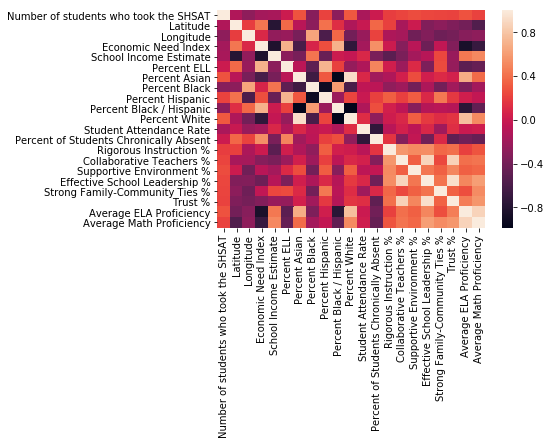

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(df_numerical.corr())

Conclusion: All the numeric columns chosen have a significant impact on the number of students who took the SHSAT. 